In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/blackmamba-ops/Stellar-Classification/blob/main/Stellar_classification.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/blackmamba-ops/Stellar-Classification.git">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>


# **Stellar Classification Model with Python and Streamlit**

## **Introduction**

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

**Features:**

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. redshift = redshift value based on the increase in wavelength
15. plate = plate ID, identifies each plate in SDSS
16. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
17. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

**Target:**

class = object class (galaxy, star or quasar object)



# **Model Implemented Without any preprocessing,Hyperparameter Tuning and Feature Engineering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/star_classification.csv")


# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Split features and target variable
X = df.drop(['class'], axis=1)
y = df['class']

# Scale features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM classifier
svm_clf = SVC(kernel='sigmoid', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


As observed, the model exhibits poor performance.

# **Model**

In [ ]:
import pandas as pd

df0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/star_classification.csv")
df0

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
df0.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

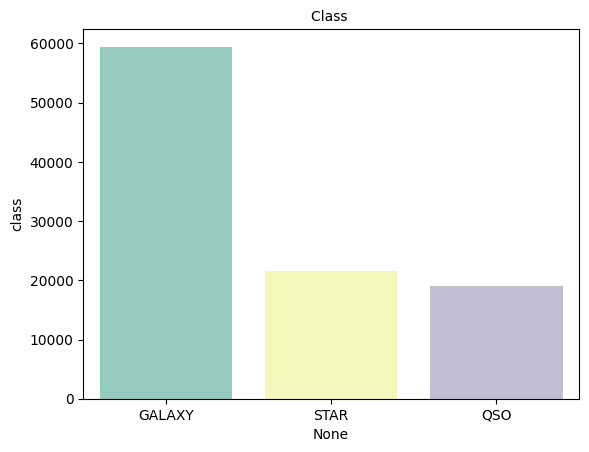

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=df0["class"].value_counts().index, y=df0["class"].value_counts(), hue=df0["class"].value_counts().index, palette="Set3", legend=False)
plt.title("Class ",fontsize=10)
plt.show()

In [ ]:
df0['class'] = df0['class'].map(lambda x: {'GALAXY': 0, 'STAR': 1, 'QSO': 2}[x])

## **Detect Outliers**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
outlier = LocalOutlierFactor()
y_pred = outlier.fit_predict(df0)

In [ ]:
x_score = outlier.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [ ]:
len(outlier_index)

15256

In [ ]:
df0.drop(outlier_index, inplace=True)

## **Feature Selection**

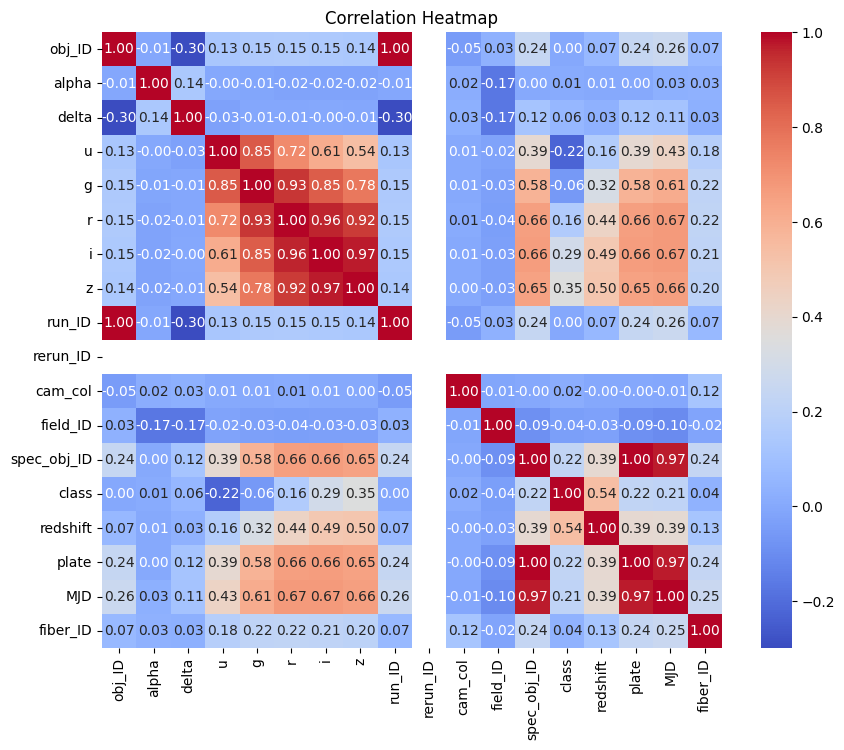

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df0.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
corr = df0.corr()  #Pearson correlation coefficient

In [ ]:
corr["class"].sort_values()

u             -0.222802
g             -0.058192
field_ID      -0.037542
run_ID         0.000250
obj_ID         0.000252
alpha          0.008187
cam_col        0.017789
fiber_ID       0.037319
delta          0.058947
r              0.160654
MJD            0.214433
spec_obj_ID    0.224718
plate          0.224718
i              0.294075
z              0.349711
redshift       0.541667
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [ ]:
df0 = df0.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

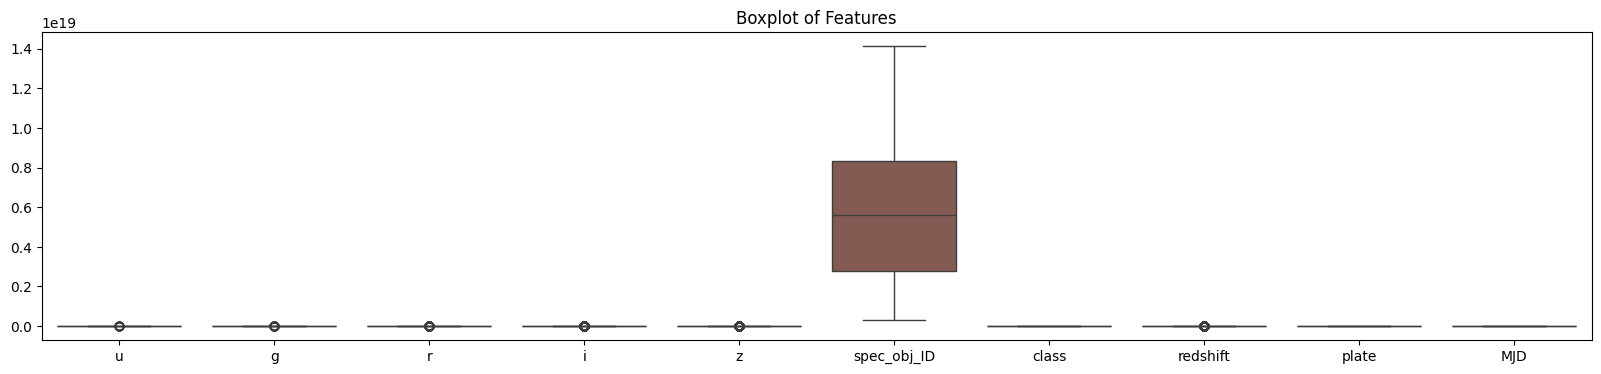

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 4))
sns.boxplot(data=df0)
plt.title('Boxplot of Features')
plt.show()


## **Features and Targets**

In [ ]:
X = df0.drop(['class'], axis = 1)
X

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0.779136,10445,58158
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0.116123,6121,56187
6,21.46973,21.17624,20.92829,20.60826,20.42573,1.246262e+19,0.586455,11069,58456
...,...,...,...,...,...,...,...,...,...
99994,20.96526,19.81625,19.34186,19.14711,19.05790,1.154061e+18,0.175206,1025,53239
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,0.000000,9374,57749
99996,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,0.404895,7626,56934
99997,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,0.143366,2764,54535


In [ ]:
y = df0['class']
y

0        0
1        0
3        0
4        0
6        2
        ..
99994    0
99995    0
99996    0
99997    0
99999    0
Name: class, Length: 84744, dtype: int64

## **Dealing with Imbalanced Data**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

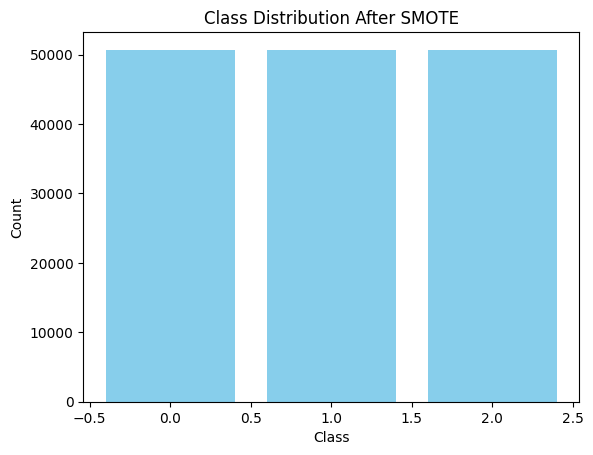

In [ ]:
import matplotlib.pyplot as plt

class_counts = y.value_counts()

plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()


## **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)
X_Scaled

array([[ 1.02944856,  0.96134111,  0.38395744, ..., -0.08681725,
         0.15306077,  0.35209163],
       [ 1.46580509,  1.25958196,  1.63169388, ...,  0.0773758 ,
         1.69229896,  1.34727933],
       [ 0.18370041,  1.76578442,  1.07729252, ...,  0.2516555 ,
         1.26172424,  1.28163224],
       ...,
       [-0.27593449,  0.23328286,  0.61169064, ...,  0.37159346,
         1.01819702,  1.2016421 ],
       [-0.51610607,  0.14490936,  0.42099718, ...,  0.80412637,
         1.12750187,  0.92415906],
       [-0.10825266,  0.56581392,  0.7479541 , ...,  0.48540381,
         1.90127389,  1.52932586]])

In [ ]:
df0

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187
6,21.46973,21.17624,20.92829,20.60826,20.42573,1.246262e+19,2,0.586455,11069,58456
...,...,...,...,...,...,...,...,...,...,...
99994,20.96526,19.81625,19.34186,19.14711,19.05790,1.154061e+18,0,0.175206,1025,53239
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,0,0.000000,9374,57749
99996,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,0,0.404895,7626,56934
99997,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,0,0.143366,2764,54535


## **Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state=42)

## **GPU RAPID**

In [ ]:
# !nvidia-smi

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pynvml/nvml.py", line 1798, in _LoadNvmlLibrary
    nvmlLib = CDLL("libnvidia-ml.so.1")
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: libnvidia-ml.so.1: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 18, in <module>
    pynvml.nvmlInit()
  File "/usr/local/lib/python3.10/dist-packages/pynvml/nvml.py", line 1770, in nvmlInit
    nvmlInitWithFlags(0)
  File "/usr/local/lib/python3.10/dist-packages/pynvml/nvml.py", line 1753, in nvmlInitWithFlags
    _LoadNvmlLibrary()
  File "/usr/local/lib/python3.10/dist-packages/pynvml/nvml.py", line 1800, in _LoadNvmlLibrary


#### Model with GPU compatibility.

In [ ]:
# Model with GPU compatibility.

from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier
from cuml.neighbors import KNeighborsClassifier as cuKNeighborsClassifier
from xgboost import XGBClassifier

# Models and their respective parameter grids
models = {
    'Random Forest': cuRandomForestClassifier(),
    'KNN': cuKNeighborsClassifier(),
    'XGBoost': XGBClassifier(tree_method="hist", device="cuda"),
}

param_grid = {
    'Random Forest': {'n_estimators': [200, 300, 400], 'max_depth': [20, 30, 40]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'XGBoost': {'n_estimators': [500, 700, 800], 'max_depth': [7, 9, 11]},
}

# Perform PCA for feature extraction
from cuml.decomposition import PCA as cuPCA

pca = cuPCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)

# Train models on the transformed data and compare accuracies
best_models = {}
best_accuracy = 0
best_model_name = ''
for name, model in models.items():
    clf = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    clf.fit(X_train_pca, y_train)
    best_models[name] = clf.best_estimator_  # select best model based on accuracy
    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {clf.best_score_}")
    if clf.best_score_ > best_accuracy:
        best_accuracy = clf.best_score_
        best_model_name = name

    # Generate classification report for the best model
    y_pred = clf.predict(pca.transform(X_test))
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")

print(f"\nBest model with highest cross-validation accuracy: {best_model_name} (Accuracy: {best_accuracy})")


#### Model without GPU compatibility.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Models and their respective parameter grids
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
}

param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'XGBoost': {'n_estimators': [500, 700, 800], 'max_depth': [7, 9, 11]}
}

# Train models on the original data and compare accuracies
best_models = {}
best_accuracy = 0
best_model_name = ''
for name, model in models.items():
    clf = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_  # Select best model based on accuracy
    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {clf.best_score_}")
    if clf.best_score_ > best_accuracy:
        best_accuracy = clf.best_score_
        best_model_name = name

print(f"\nBest model with highest cross-validation accuracy: {best_model_name} (Accuracy: {best_accuracy})")


Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}
Best cross-validation accuracy for Random Forest: 0.9833363033684585
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.959871888514305
Best parameters for XGBoost: {'max_depth': 9, 'n_estimators': 800}
Best cross-validation accuracy for XGBoost: 0.9824345474097503

Best model with highest cross-validation accuracy: Random Forest (Accuracy: 0.9833363033684585)


- `best_models` is a dictionary that contains all the models along with their parameters or estimators, identified by their names.
- `best_model_name` stores the name of the best-performing model based on cross-validation accuracy.
- We save the best model to a pickle file, we can retrieve it using the name stored in `best_model_name` to access the corresponding model from the `best_models` dictionary.

In [ ]:
import pickle

best_model = best_models[best_model_name]

# Save the best model to a pickle file
with open('best_model.sav', 'wb') as f:
    pickle.dump(best_model, f)

with open('Scaler.sav', 'wb') as f:
    pickle.dump(Scaler, f)

In [ ]:
import pickle
from sklearn.metrics import accuracy_score

with open("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/best_model.sav", "rb") as f:
    best_model = pickle.load(f)

predictions = best_model.predict(X_test)
class_mapping = {0: 'GALAXY', 1: 'STAR', 2: 'QSO'}

# Convert numerical predictions to class names
class_predictions = [class_mapping[label] for label in predictions]

print("Predictions:", class_predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Predictions: ['GALAXY', 'STAR', 'QSO', 'QSO', 'GALAXY', 'STAR', 'STAR', 'GALAXY', 'QSO', 'QSO', 'STAR', 'GALAXY', 'STAR', 'GALAXY', 'STAR', 'STAR', 'GALAXY', 'STAR', 'QSO', 'GALAXY', 'GALAXY', 'GALAXY', 'GALAXY', 'STAR', 'GALAXY', 'QSO', 'STAR', 'STAR', 'QSO', 'STAR', 'GALAXY', 'QSO', 'QSO', 'GALAXY', 'STAR', 'STAR', 'STAR', 'QSO', 'GALAXY', 'STAR', 'GALAXY', 'QSO', 'STAR', 'QSO', 'QSO', 'GALAXY', 'QSO', 'STAR', 'STAR', 'QSO', 'STAR', 'GALAXY', 'GALAXY', 'GALAXY', 'QSO', 'STAR', 'GALAXY', 'QSO', 'STAR', 'STAR', 'STAR', 'STAR', 'QSO', 'QSO', 'QSO', 'STAR', 'QSO', 'QSO', 'QSO', 'STAR', 'QSO', 'GALAXY', 'QSO', 'QSO', 'STAR', 'GALAXY', 'GALAXY', 'STAR', 'QSO', 'GALAXY', 'STAR', 'QSO', 'STAR', 'QSO', 'QSO', 'QSO', 'QSO', 'STAR', 'QSO', 'STAR', 'GALAXY', 'QSO', 'GALAXY', 'STAR', 'QSO', 'QSO', 'STAR', 'QSO', 'STAR', 'GALAXY', 'QSO', 'QSO', 'GALAXY', 'STAR', 'STAR', 'QSO', 'QSO', 'QSO', 'QSO', 'QSO', 'GALAXY', 'STAR', 'QSO', 'QSO', 'STAR', 'GALAXY', 'STAR', 'QSO', 'STAR', 'STAR', 'STAR', 'STAR

# **Deploying On LocalTunnel Using Streamlit Framework**

Since I cannot run Streamlit directly within a Colab notebook, I use npx (Node Package Manager) along with localtunnel to expose my local Streamlit server to the internet. This allows me to share and access my Streamlit app via a publicly accessible URL generated by localtunnel, making it accessible from anywhere. The localtunnel command typically includes the port information, such as --port 8501, to specify which port my Streamlit app is running on. So the complete command might look like this: npx localtunnel --port 8501.

In [ ]:
!pip install streamlit
!pip install streamlit-lottie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 7.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import base64
import json
import streamlit as st
import pickle
from streamlit_lottie import st_lottie

# Set page title and favicon
st.set_page_config(page_title="Stellar Classification", page_icon=":star:")

def load_lottiefiles(filepath: str):
    with open(filepath, "r") as f:
        return json.load(f)

# ---- LOAD ASSETS ----
lottie_coding = load_lottiefiles("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/planets.json")

# ---- HEADER SECTION ----
with st.container():
    st.title("Stellar Classification Model v.1.0")
    st.subheader("Welcome to Stellar Classification :telescope:")
    st.write(
        "Introducing our stellar classification tool. With the power of machine learning, we categorize  "
        "celestial objects into Galaxy, Star, or Quasar (QSO) groups based on your provided "
        "parameters. Just input your data and hit **Predict** to see the classification. "
    )
    st.write()

# ---- WHAT I DO ----
with st.container():
    st.write("---")
    left_column, right_column = st.columns(2)
    with left_column:
        st.header("What Is Stellar Classification..?")
        st.write("##")
        st.write(
            """
        Stellar classification is the classification of stars based on their spectral characteristics.
        Astronomers observe and measure these characteristics to categorize stars into different types,
        which provide valuable insights into their temperature, luminosity, size, and composition.

        """
        )
        st.markdown("[Watch this video for a deeper insight into the topic🎬](https://youtu.be/Y5VU3Mp6abI)")
    with right_column:
        st_lottie(lottie_coding, height=300, key="coding")

def main():

    ultraviolet_filter = float("23.87882")
    green_filter = float("22.2753")
    red_filter = float("20.39501")
    near_infrared_filter = float("19.16573")
    infrared_filter = float("18.79371")
    SpectroscopicObjectID = float("6.54378E+18")
    Redshift = float("0.6347936")
    ModifiedJulianDate = int("56354")
    plate = int("5812")

    ultraviolet_filter_input = st.session_state.get("ultraviolet_filter_input", None)
    green_filter_input = st.session_state.get("green_filter_input", None)
    red_filter_input = st.session_state.get("red_filter_input", None)
    near_infrared_filter_input = st.session_state.get("near_infrared_filter_input", None)
    infrared_filter_input = st.session_state.get("infrared_filter_input", None)
    SpectroscopicObjectID_input = st.session_state.get("SpectroscopicObjectID_input", None)
    Redshift_input = st.session_state.get("Redshift_input", None)
    ModifiedJulianDate_input = st.session_state.get("ModifiedJulianDate_input", None)
    plate_input = st.session_state.get("plate_input", None)

    st.subheader("Fill in the fields")
    st.sidebar.header("MENU")

    @st.cache_data
    def get_img_as_base64(file):
        with open(file, "rb") as f:
            data = f.read()
        return base64.b64encode(data).decode()

    img = get_img_as_base64("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/wallpaperflare.com_wallpaper (1).jpg")

    # Add custom CSS for the sidebar background image
    def sidebar_background_image():
        sidebar_bg_css = f"""
        <style>
          [data-testid="stSidebar"] > div:first-child {{
          background-image: url("data:image/png;base64,{img}");
          background-position: center;
          background-repeat: no-repeat;
          background-attachment: fixed;
          }}
        </style>
        """
        st.markdown(sidebar_bg_css, unsafe_allow_html=True)

    # Apply sidebar background image
    sidebar_background_image()

    # Lottie animation in the sidebar
    st.sidebar.write("---")

    # About tab
    st.sidebar.title("About")
    st.sidebar.write("This model has been trained on over 100,000 observations and is designed to deliver predictions with up to 98% accuracy. Utilizing a RandomForest classifier, it embodies robustness and reliability in predictive analytics.")

    # Tips icon with bulb icon
    st.sidebar.title("Tips")
    st.sidebar.write("💡 Tip: You can input the following parameters for classification:")
    st.sidebar.write("- u = Ultraviolet filter in the photometric system")
    st.sidebar.write("- g = Green filter in the photometric system")
    st.sidebar.write("- r = Red filter in the photometric system")
    st.sidebar.write("- i = Near Infrared filter in the photometric system")
    st.sidebar.write("- z = Infrared filter in the photometric system")
    st.sidebar.write("- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)")
    st.sidebar.write("- redshift = redshift value based on the increase in wavelength")
    st.sidebar.write("- plate = plate ID, identifies each plate in SDSS")
    st.sidebar.write("- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken")
    st.sidebar.write("")
    st.sidebar.markdown("[Click here to run this app on Google Colab](https://colab.research.google.com/drive/1kn0c0UJjK_zGSwEnuXgvCZXXQN8RQlv2?pli=1#scrollTo=5jwtk1Zwn5kT&uniqifier=1)", unsafe_allow_html=True)

    button_clicked = st.button("Demo Values")

    if button_clicked:
        ultraviolet_filter_input = ultraviolet_filter
        green_filter_input = green_filter
        red_filter_input = red_filter
        near_infrared_filter_input = near_infrared_filter
        infrared_filter_input = infrared_filter
        SpectroscopicObjectID_input = SpectroscopicObjectID
        Redshift_input = Redshift
        ModifiedJulianDate_input = ModifiedJulianDate
        plate_input = plate

    columns = st.columns(2)
    with columns[0]:
            ultraviolet_filter_input = st.text_input("Ultraviolet Filter(u)", ultraviolet_filter_input, placeholder="Enter value")
            green_filter_input = st.text_input("Green Filter(g)", green_filter_input, placeholder="Enter value")
            plate_input = st.text_input("Physical Photographic Plate (plate)", plate_input, placeholder="Enter value")
            ModifiedJulianDate_input = st.text_input("Modified Julian Date (MJD)", ModifiedJulianDate_input, placeholder="Enter value")
            Redshift_input = st.text_input("Redshift", Redshift_input, placeholder="Enter value")

    with columns[1]:
            red_filter_input = st.text_input("Red Filter(r)", red_filter_input, placeholder="Enter value")
            near_infrared_filter_input = st.text_input("Near Infrared Filter(i)", near_infrared_filter_input, placeholder="Enter value")
            infrared_filter_input = st.text_input("Infrared Filter(z)", infrared_filter_input, placeholder="Enter value")
            SpectroscopicObjectID_input = st.text_input("Spectroscopic Object ID (spec_obj_ID)", SpectroscopicObjectID_input, placeholder="Enter value")
            try:
                SpectroscopicObjectID_input = float(SpectroscopicObjectID_input) if SpectroscopicObjectID_input else None
            except ValueError:
                # Handle the case where the input cannot be converted to float
                SpectroscopicObjectID_input = None

    st.session_state.ultraviolet_filter_input = ultraviolet_filter_input
    st.session_state.green_filter_input = green_filter_input
    st.session_state.red_filter_input = red_filter_input
    st.session_state.near_infrared_filter_input = near_infrared_filter_input
    st.session_state.infrared_filter_input = infrared_filter_input
    st.session_state.SpectroscopicObjectID_input = SpectroscopicObjectID_input
    st.session_state.Redshift_input = Redshift_input
    st.session_state.ModifiedJulianDate_input = ModifiedJulianDate_input
    st.session_state.plate_input = plate_input

    features = [ultraviolet_filter_input, green_filter_input, red_filter_input, near_infrared_filter_input, infrared_filter_input, SpectroscopicObjectID_input, Redshift_input, ModifiedJulianDate_input, plate_input]
    features = [float(value) if value else 0.0 for value in features]
    model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/best_model.sav','rb'))
    scaler = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/Scaler.sav", 'rb'))
    pred = st.button('PREDICT', key="predict_button")

    if pred:
        print("Features:", features)

        if any(value == 0.0 for value in features) or not any(features):
            st.warning("Please provide values for prediction.")
        else:
            predictions = model.predict(scaler.fit_transform([features]))
            if predictions == 0:
                st.write("Predicted as : GALAXY")
            elif predictions == 1:
                st.write("Predicted as : STAR")
            elif predictions == 2:
                st.write("Predicted as : QSO")
            else:
                st.write("Error!")

    def load_lottiefile(filepath: str):
        with open(filepath, "r") as f:
            return json.load(f)

    lottie_coding1 = load_lottiefile("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/insta.json")
    lottie_coding2 = load_lottiefile("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/Location.json")
    lottie_coding3 = load_lottiefile("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/email.json")
    lottie_coding4 = load_lottiefile("/content/drive/MyDrive/Colab Notebooks/Luminar/Classification Project/Git.json")

    st.write("---")
    st.header("")
    st.write("##")

    # Position each Lottie animation within a container
    col1, col2 = st.columns(2)

    with col1:
        st.write('<div class="lottie-container">', unsafe_allow_html=True)
        st_lottie(
            lottie_coding1,
            speed=1,
            reverse=False,
            loop=True,
            quality="high",  # medium ; high
            # renderer="svg", # canvas
            height=100,
            width=100,
            key=None,
        )
        st.markdown('<div style="text-align:center;">', unsafe_allow_html=True)
        st.markdown('<a href="https://www.instagram.com/accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Faccounts%2Femailpreferences%2F%3F__coig_login%3D1" style="color: white; text-align: center;">Instagram</a>', unsafe_allow_html=True)
        st.markdown('</div>', unsafe_allow_html=True)
        st.write('<div class="lottie-container">', unsafe_allow_html=True)
        st_lottie(
            lottie_coding2,
            speed=1,
            reverse=False,
            loop=True,
            quality="high",  # medium ; high
            # renderer="svg", # canvas
            height=100,
            width=100,
            key=None,
        )
        st.markdown('<div style="text-align:center;">', unsafe_allow_html=True)
        st.markdown('<a href="https://www.google.com/maps/place/University+of+Maryland+Astronomy+Observatory/@23.1098838,-159.389482,3z/data=!4m10!1m2!2m1!1sastronomy+us!3m6!1s0x89b7c428525ea131:0x5d0d8032db74e7d2!8m2!3d39.0019734!4d-76.9560954!15sCgxhc3Ryb25vbXkgdXOSAQtvYnNlcnZhdG9yeeABAA!16zL20vMDh5eWJk?entry=ttu" style="color: white; text-align: center;">3255 Metzerott Rd,USA</a>', unsafe_allow_html=True)
        st.markdown('</div>', unsafe_allow_html=True)


    with col2:
        st.write('<div class="lottie-container">', unsafe_allow_html=True)
        st_lottie(
            lottie_coding3,
            speed=1,
            reverse=False,
            loop=True,
            quality="high",  # medium ; high
            # renderer="svg", # canvas
            height=100,
            width=100,
            key=None,
        )
        st.markdown('<div style="text-align:center;">', unsafe_allow_html=True)
        st.markdown('<a href="https://accounts.google.com/v3/signin/identifier?authuser=0&continue=https%3A%2F%2Fmyaccount.google.com%2F%3Futm_source%3Dsign_in_no_continue%26pli%3D1&ec=GAlAwAE&hl=en&service=accountsettings&flowName=GlifWebSignIn&flowEntry=AddSession&dsh=S-586929882%3A1709440345837446&theme=glif" style="color: white; ">Contact Us</a>', unsafe_allow_html=True)
        st.markdown('</div>', unsafe_allow_html=True)
        st.write('<div class="lottie-container">', unsafe_allow_html=True)
        st_lottie(
            lottie_coding4,
            speed=1,
            reverse=False,
            loop=True,
            quality="high",  # medium ; high
            # renderer="svg", # canvas
            height=100,
            width=100,
            key=None,
        )
        st.markdown('<div style="text-align:center;">', unsafe_allow_html=True)
        st.markdown('<a href="https://github.com/blackmamba-ops/Stellar-Classification.git" style="color: white; text-align: center;">Github</a>', unsafe_allow_html=True)
        st.markdown('</div>', unsafe_allow_html=True)


if __name__ == "__main__":
    main()

st.write()
st.write()

st.markdown("<br>"*5, unsafe_allow_html=True)


st.markdown(
    '<span style="color:white;text-shadow:0 0 5px rgba(0,0,0,0.5);display:block;text-align:center;">Copyright © 2024, Stellar v1.0 Inc.</span>'
    '<span style="color:white;text-shadow:0 0 5px rgba(0,0,0,0.5);display:block;text-align:center;">Model may display inaccurate info, so double-check its responses</span>',
    unsafe_allow_html=True
)



Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[##................] / loadDep:strip-ansi: sill resolveWithNewModule ansi-regex


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.12.157:8501

npx: installed 22 in 3.813s
your url is: https://slimy-tires-dig.loca.lt


##### Copyright 2024 BASIL K AJI